In [4]:
import yfinance as yf
import pandas as pd 
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import talib.abstract as ta
import ta as ta2
import tti
import yfinance as yf
import pandas as pd 
import sklearn.model_selection as sk
import numpy as np
from ignite.engine import Engine, Events
from ignite.handlers import EarlyStopping
import matplotlib.pyplot as plt
import scipy.stats as stats

In [5]:
data = yf.download('BTC-USD',period="1D",interval="2m")
data=data.rename({"High":"high","Low":"low","Close":"close","Open":"open","Adj Close":"adj close","Volume":"volume"},axis=1)

data

[*********************100%%**********************]  1 of 1 completed


,open,high,low,close,adj close,volume
Datetime,,,,,,
2023-10-05 00:00:00+00:00,27798.646484,27798.646484,27791.210938,27791.210938,27791.210938,0
2023-10-05 00:02:00+00:00,27772.718750,27775.693359,27772.718750,27775.693359,27775.693359,0
2023-10-05 00:04:00+00:00,27753.474609,27753.474609,27753.474609,27753.474609,27753.474609,7013376
2023-10-05 00:06:00+00:00,27753.460938,27763.191406,27753.460938,27763.191406,27763.191406,0
2023-10-05 00:08:00+00:00,27754.568359,27754.568359,27754.568359,27754.568359,27754.568359,4096
...,...,...,...,...,...,...
2023-10-05 13:24:00+00:00,27938.296875,27938.296875,27938.296875,27938.296875,27938.296875,32929792
2023-10-05 13:26:00+00:00,27966.888672,27966.888672,27966.154297,27966.154297,27966.154297,19507200
2023-10-05 13:28:00+00:00,27989.576172,27989.576172,27989.576172,27989.576172,27989.576172,29193216


In [6]:
"""
import pandas as pd 
import yfinance as yf
import json
from backtest import strategy

data = yf.download('BTC-USD',period="1D",interval="2m")
data=data.rename({"High":"high","Low":"low","Close":"close","Open":"open","Adj Close":"adj close","Volume":"volume"},axis=1)
tech=strategy(data)
a=pd.DataFrame([ ["return",tech.return_sum],["MA",tech.strategyMA_sum],["DMA",tech.strategyDMA_sum],["TMA",tech.strategyTMA_sum],["TEMA",tech.strategyTEMA_sum],["MACD",tech.strategyMACD_sum],["MR",tech.strategyMR_sum]],columns=["label","y"])
json.dumps(json.loads(a.to_json(orient="records")))
"""

'\nimport pandas as pd \nimport yfinance as yf\nimport json\nfrom backtest import strategy\n\ndata = yf.download(\'BTC-USD\',period="1D",interval="2m")\ndata=data.rename({"High":"high","Low":"low","Close":"close","Open":"open","Adj Close":"adj close","Volume":"volume"},axis=1)\ntech=strategy(data)\na=pd.DataFrame([ ["return",tech.return_sum],["MA",tech.strategyMA_sum],["DMA",tech.strategyDMA_sum],["TMA",tech.strategyTMA_sum],["TEMA",tech.strategyTEMA_sum],["MACD",tech.strategyMACD_sum],["MR",tech.strategyMR_sum]],columns=["label","y"])\njson.dumps(json.loads(a.to_json(orient="records")))\n'

In [7]:
data["returns"]=data["close"].pct_change()

In [8]:
data["price"]=data['close'] /data['close'].shift(1)

In [9]:
data

,open,high,low,close,adj close,volume,returns,price
Datetime,,,,,,,,
2023-10-05 00:00:00+00:00,27798.646484,27798.646484,27791.210938,27791.210938,27791.210938,0,NaN,NaN
2023-10-05 00:02:00+00:00,27772.718750,27775.693359,27772.718750,27775.693359,27775.693359,0,-0.000558,0.999442
2023-10-05 00:04:00+00:00,27753.474609,27753.474609,27753.474609,27753.474609,27753.474609,7013376,-0.000800,0.999200
2023-10-05 00:06:00+00:00,27753.460938,27763.191406,27753.460938,27763.191406,27763.191406,0,0.000350,1.000350
2023-10-05 00:08:00+00:00,27754.568359,27754.568359,27754.568359,27754.568359,27754.568359,4096,-0.000311,0.999689
...,...,...,...,...,...,...,...,...
2023-10-05 13:24:00+00:00,27938.296875,27938.296875,27938.296875,27938.296875,27938.296875,32929792,-0.001028,0.998972
2023-10-05 13:26:00+00:00,27966.888672,27966.888672,27966.154297,27966.154297,27966.154297,19507200,0.000997,1.000997
2023-10-05 13:28:00+00:00,27989.576172,27989.576172,27989.576172,27989.576172,27989.576172,29193216,0.000838,1.000838


Double MA

In [10]:
data["emashort"]=ta.EMA(data["close"],10)
data["emalong"]=ta.EMA(data["close"],50)


In [11]:
data['positionDMA'] = np.where(data['emashort'] > data['emalong'],1, -1)

In [12]:
data['strategyDMA'] = data['positionDMA'].shift(1) * data['returns']

In [13]:
a,b=data[['returns', 'strategyDMA']].sum()

In [14]:
a

0.009166164389496245

In [15]:
data

,open,high,low,close,adj close,volume,returns,price,emashort,emalong,positionDMA,strategyDMA
Datetime,,,,,,,,,,,,
2023-10-05 00:00:00+00:00,27798.646484,27798.646484,27791.210938,27791.210938,27791.210938,0,NaN,NaN,NaN,NaN,-1,NaN
2023-10-05 00:02:00+00:00,27772.718750,27775.693359,27772.718750,27775.693359,27775.693359,0,-0.000558,0.999442,NaN,NaN,-1,0.000558
2023-10-05 00:04:00+00:00,27753.474609,27753.474609,27753.474609,27753.474609,27753.474609,7013376,-0.000800,0.999200,NaN,NaN,-1,0.000800
2023-10-05 00:06:00+00:00,27753.460938,27763.191406,27753.460938,27763.191406,27763.191406,0,0.000350,1.000350,NaN,NaN,-1,-0.000350
2023-10-05 00:08:00+00:00,27754.568359,27754.568359,27754.568359,27754.568359,27754.568359,4096,-0.000311,0.999689,NaN,NaN,-1,0.000311
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-05 13:24:00+00:00,27938.296875,27938.296875,27938.296875,27938.296875,27938.296875,32929792,-0.001028,0.998972,27885.177949,27771.786866,1,-0.001028
2023-10-05 13:26:00+00:00,27966.888672,27966.888672,27966.154297,27966.154297,27966.154297,19507200,0.000997,1.000997,27899.900922,27779.409118,1,0.000997
2023-10-05 13:28:00+00:00,27989.576172,27989.576172,27989.576172,27989.576172,27989.576172,29193216,0.000838,1.000838,27916.205513,27787.650963,1,0.000838


In [16]:
data[["returns_cumsum", 'strategyDMA_cumsum']]=data[['returns', 'strategyDMA']].cumsum()

In [17]:
data

,open,high,low,close,adj close,volume,returns,price,emashort,emalong,positionDMA,strategyDMA,returns_cumsum,strategyDMA_cumsum
Datetime,,,,,,,,,,,,,,
2023-10-05 00:00:00+00:00,27798.646484,27798.646484,27791.210938,27791.210938,27791.210938,0,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN
2023-10-05 00:02:00+00:00,27772.718750,27775.693359,27772.718750,27775.693359,27775.693359,0,-0.000558,0.999442,NaN,NaN,-1,0.000558,-0.000558,0.000558
2023-10-05 00:04:00+00:00,27753.474609,27753.474609,27753.474609,27753.474609,27753.474609,7013376,-0.000800,0.999200,NaN,NaN,-1,0.000800,-0.001358,0.001358
2023-10-05 00:06:00+00:00,27753.460938,27763.191406,27753.460938,27763.191406,27763.191406,0,0.000350,1.000350,NaN,NaN,-1,-0.000350,-0.001008,0.001008
2023-10-05 00:08:00+00:00,27754.568359,27754.568359,27754.568359,27754.568359,27754.568359,4096,-0.000311,0.999689,NaN,NaN,-1,0.000311,-0.001319,0.001319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-05 13:24:00+00:00,27938.296875,27938.296875,27938.296875,27938.296875,27938.296875,32929792,-0.001028,0.998972,27885.177949,27771.786866,1,-0.001028,0.005306,0.011835
2023-10-05 13:26:00+00:00,27966.888672,27966.888672,27966.154297,27966.154297,27966.154297,19507200,0.000997,1.000997,27899.900922,27779.409118,1,0.000997,0.006303,0.012832
2023-10-05 13:28:00+00:00,27989.576172,27989.576172,27989.576172,27989.576172,27989.576172,29193216,0.000838,1.000838,27916.205513,27787.650963,1,0.000838,0.007140,0.013669


<Axes: xlabel='Datetime'>

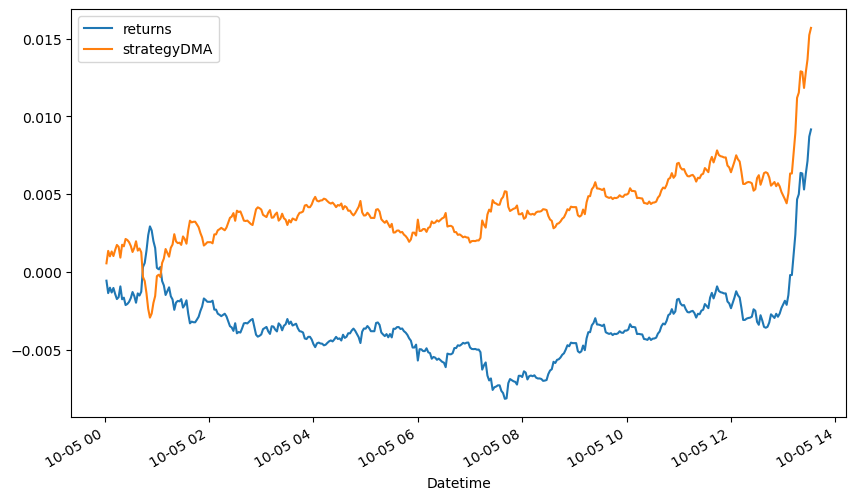

In [18]:
data[['returns', 'strategyDMA']].cumsum().plot(figsize=(10, 6))

MA

In [19]:
data["ema"]=ta.EMA(data["close"],50)

In [20]:
data['positionMA'] = np.where(data['ema'] < data['close'],1, -1)

In [21]:
data['strategyMA'] = data['positionMA'].shift(1) * data['returns']

In [22]:
data[['returns', 'strategyMA']].sum()

returns       0.009166
strategyMA    0.019978
dtype: float64

<Axes: xlabel='Datetime'>

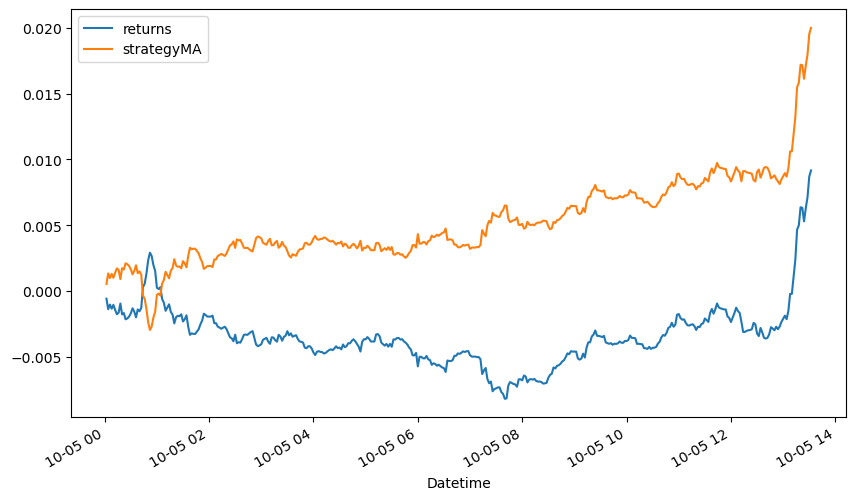

In [23]:
data[['returns', 'strategyMA']].cumsum().plot(figsize=(10, 6))

Triple MA

In [24]:
data["ema_10"]=ta.EMA(data["close"],10)
data["ema_25"]=ta.EMA(data["close"],25)
data["ema_50"]=ta.EMA(data["close"],50)

In [25]:
(data['ema_10'] > data['ema_25']) & (data['ema_10'] > data['ema_50'])

Datetime
2023-10-05 00:00:00+00:00    False
2023-10-05 00:02:00+00:00    False
2023-10-05 00:04:00+00:00    False
2023-10-05 00:06:00+00:00    False
2023-10-05 00:08:00+00:00    False
                             ...  
2023-10-05 13:24:00+00:00     True
2023-10-05 13:26:00+00:00     True
2023-10-05 13:28:00+00:00     True
2023-10-05 13:30:00+00:00     True
2023-10-05 13:32:00+00:00     True
Length: 406, dtype: bool

In [26]:
data['positionTMA'] = np.where((data['ema_10'] > data['ema_25']) & (data['ema_10'] > data['ema_50']),1, -1)

In [27]:
data['strategyTMA'] = data['positionTMA'].shift(1) * data['returns']

In [28]:
data[['returns', 'strategyTMA']].sum()

returns        0.009166
strategyTMA    0.013784
dtype: float64

<Axes: xlabel='Datetime'>

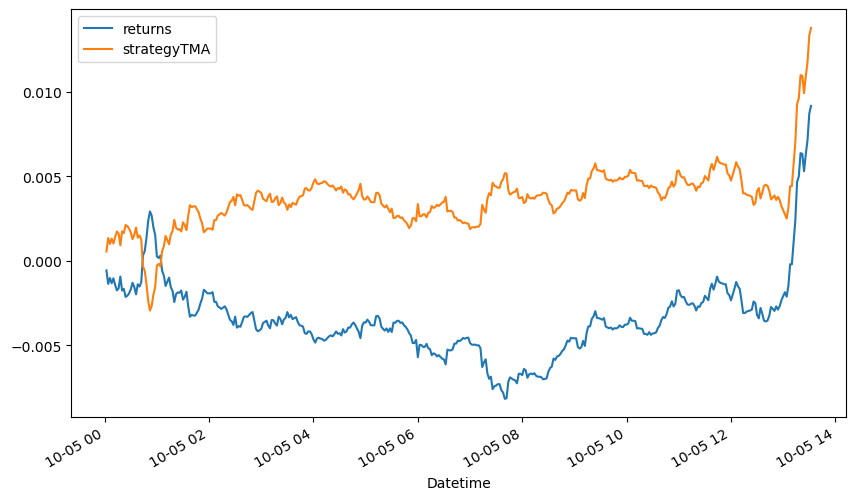

In [29]:
data[['returns', 'strategyTMA']].cumsum().plot(figsize=(10, 6))

TEMA

In [30]:
data["ema1"]=ta.EMA(data["close"],50)
data["ema2"]=ta.EMA(data["close"],50)
data["ema3"]=ta.EMA(data["close"],50)
data["tema"]=3*data["ema1"]-3*data["ema2"]+data["ema3"]


In [31]:
data

,open,high,low,close,adj close,volume,returns,price,emashort,emalong,...,strategyMA,ema_10,ema_25,ema_50,positionTMA,strategyTMA,ema1,ema2,ema3,tema
Datetime,,,,,,,,,,,,,,,,,,,,,
2023-10-05 00:00:00+00:00,27798.646484,27798.646484,27791.210938,27791.210938,27791.210938,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN
2023-10-05 00:02:00+00:00,27772.718750,27775.693359,27772.718750,27775.693359,27775.693359,0,-0.000558,0.999442,NaN,NaN,...,0.000558,NaN,NaN,NaN,-1,0.000558,NaN,NaN,NaN,NaN
2023-10-05 00:04:00+00:00,27753.474609,27753.474609,27753.474609,27753.474609,27753.474609,7013376,-0.000800,0.999200,NaN,NaN,...,0.000800,NaN,NaN,NaN,-1,0.000800,NaN,NaN,NaN,NaN
2023-10-05 00:06:00+00:00,27753.460938,27763.191406,27753.460938,27763.191406,27763.191406,0,0.000350,1.000350,NaN,NaN,...,-0.000350,NaN,NaN,NaN,-1,-0.000350,NaN,NaN,NaN,NaN
2023-10-05 00:08:00+00:00,27754.568359,27754.568359,27754.568359,27754.568359,27754.568359,4096,-0.000311,0.999689,NaN,NaN,...,0.000311,NaN,NaN,NaN,-1,0.000311,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-05 13:24:00+00:00,27938.296875,27938.296875,27938.296875,27938.296875,27938.296875,32929792,-0.001028,0.998972,27885.177949,27771.786866,...,-0.001028,27885.177949,27812.444303,27771.786866,1,-0.001028,27771.786866,27771.786866,27771.786866,27771.786866
2023-10-05 13:26:00+00:00,27966.888672,27966.888672,27966.154297,27966.154297,27966.154297,19507200,0.000997,1.000997,27899.900922,27779.409118,...,0.000997,27899.900922,27824.268149,27779.409118,1,0.000997,27779.409118,27779.409118,27779.409118,27779.409118
2023-10-05 13:28:00+00:00,27989.576172,27989.576172,27989.576172,27989.576172,27989.576172,29193216,0.000838,1.000838,27916.205513,27787.650963,...,0.000838,27916.205513,27836.984151,27787.650963,1,0.000838,27787.650963,27787.650963,27787.650963,27787.650963


In [32]:
data['positionTEMA'] = np.where(data['tema'] < data['close'],1, -1)

In [33]:
data['strategyTEMA'] = data['positionTEMA'].shift(1) * data['returns']

In [34]:
data[['returns', 'strategyTEMA']].sum()

returns         0.009166
strategyTEMA    0.019978
dtype: float64

<Axes: xlabel='Datetime'>

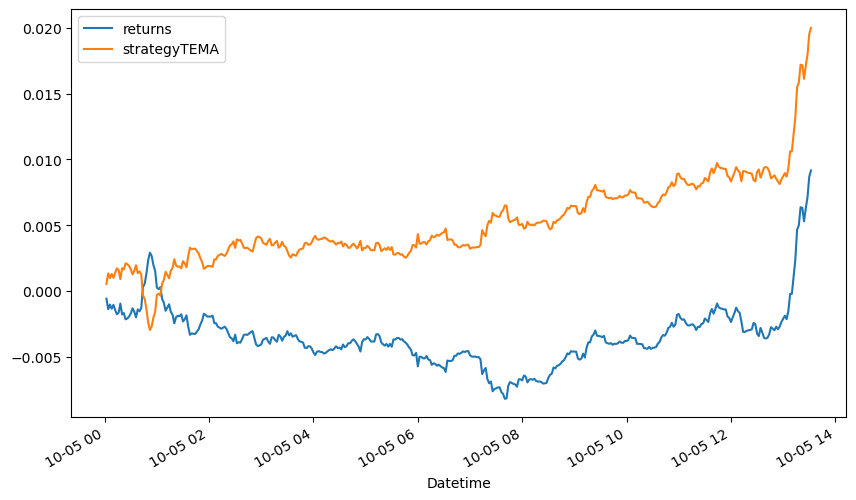

In [35]:
data[['returns', 'strategyTEMA']].cumsum().plot(figsize=(10, 6))

MACD Crossover

In [36]:

data["macdline"]=ta.EMA(data["close"],12)-ta.EMA(data["close"],26)
data["signalline"]=ta.EMA(pd.DataFrame(data["macdline"]).rename({"macdline":"close"},axis=1),9)
data["macdhist"]=data["macdline"]-data["signalline"]
data


,open,high,low,close,adj close,volume,returns,price,emashort,emalong,...,strategyTMA,ema1,ema2,ema3,tema,positionTEMA,strategyTEMA,macdline,signalline,macdhist
Datetime,,,,,,,,,,,,,,,,,,,,,
2023-10-05 00:00:00+00:00,27798.646484,27798.646484,27791.210938,27791.210938,27791.210938,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN
2023-10-05 00:02:00+00:00,27772.718750,27775.693359,27772.718750,27775.693359,27775.693359,0,-0.000558,0.999442,NaN,NaN,...,0.000558,NaN,NaN,NaN,NaN,-1,0.000558,NaN,NaN,NaN
2023-10-05 00:04:00+00:00,27753.474609,27753.474609,27753.474609,27753.474609,27753.474609,7013376,-0.000800,0.999200,NaN,NaN,...,0.000800,NaN,NaN,NaN,NaN,-1,0.000800,NaN,NaN,NaN
2023-10-05 00:06:00+00:00,27753.460938,27763.191406,27753.460938,27763.191406,27763.191406,0,0.000350,1.000350,NaN,NaN,...,-0.000350,NaN,NaN,NaN,NaN,-1,-0.000350,NaN,NaN,NaN
2023-10-05 00:08:00+00:00,27754.568359,27754.568359,27754.568359,27754.568359,27754.568359,4096,-0.000311,0.999689,NaN,NaN,...,0.000311,NaN,NaN,NaN,NaN,-1,0.000311,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-05 13:24:00+00:00,27938.296875,27938.296875,27938.296875,27938.296875,27938.296875,32929792,-0.001028,0.998972,27885.177949,27771.786866,...,-0.001028,27771.786866,27771.786866,27771.786866,27771.786866,1,-0.001028,60.666679,38.771210,21.895469
2023-10-05 13:26:00+00:00,27966.888672,27966.888672,27966.154297,27966.154297,27966.154297,19507200,0.000997,1.000997,27899.900922,27779.409118,...,0.000997,27779.409118,27779.409118,27779.409118,27779.409118,1,0.000997,63.811570,43.779282,20.032288
2023-10-05 13:28:00+00:00,27989.576172,27989.576172,27989.576172,27989.576172,27989.576172,29193216,0.000838,1.000838,27916.205513,27787.650963,...,0.000838,27787.650963,27787.650963,27787.650963,27787.650963,1,0.000838,67.416731,48.506772,18.909959


In [37]:
data

,open,high,low,close,adj close,volume,returns,price,emashort,emalong,...,strategyTMA,ema1,ema2,ema3,tema,positionTEMA,strategyTEMA,macdline,signalline,macdhist
Datetime,,,,,,,,,,,,,,,,,,,,,
2023-10-05 00:00:00+00:00,27798.646484,27798.646484,27791.210938,27791.210938,27791.210938,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN
2023-10-05 00:02:00+00:00,27772.718750,27775.693359,27772.718750,27775.693359,27775.693359,0,-0.000558,0.999442,NaN,NaN,...,0.000558,NaN,NaN,NaN,NaN,-1,0.000558,NaN,NaN,NaN
2023-10-05 00:04:00+00:00,27753.474609,27753.474609,27753.474609,27753.474609,27753.474609,7013376,-0.000800,0.999200,NaN,NaN,...,0.000800,NaN,NaN,NaN,NaN,-1,0.000800,NaN,NaN,NaN
2023-10-05 00:06:00+00:00,27753.460938,27763.191406,27753.460938,27763.191406,27763.191406,0,0.000350,1.000350,NaN,NaN,...,-0.000350,NaN,NaN,NaN,NaN,-1,-0.000350,NaN,NaN,NaN
2023-10-05 00:08:00+00:00,27754.568359,27754.568359,27754.568359,27754.568359,27754.568359,4096,-0.000311,0.999689,NaN,NaN,...,0.000311,NaN,NaN,NaN,NaN,-1,0.000311,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-05 13:24:00+00:00,27938.296875,27938.296875,27938.296875,27938.296875,27938.296875,32929792,-0.001028,0.998972,27885.177949,27771.786866,...,-0.001028,27771.786866,27771.786866,27771.786866,27771.786866,1,-0.001028,60.666679,38.771210,21.895469
2023-10-05 13:26:00+00:00,27966.888672,27966.888672,27966.154297,27966.154297,27966.154297,19507200,0.000997,1.000997,27899.900922,27779.409118,...,0.000997,27779.409118,27779.409118,27779.409118,27779.409118,1,0.000997,63.811570,43.779282,20.032288
2023-10-05 13:28:00+00:00,27989.576172,27989.576172,27989.576172,27989.576172,27989.576172,29193216,0.000838,1.000838,27916.205513,27787.650963,...,0.000838,27787.650963,27787.650963,27787.650963,27787.650963,1,0.000838,67.416731,48.506772,18.909959


returns         0.009166
strategyMACD    0.015862
dtype: float64

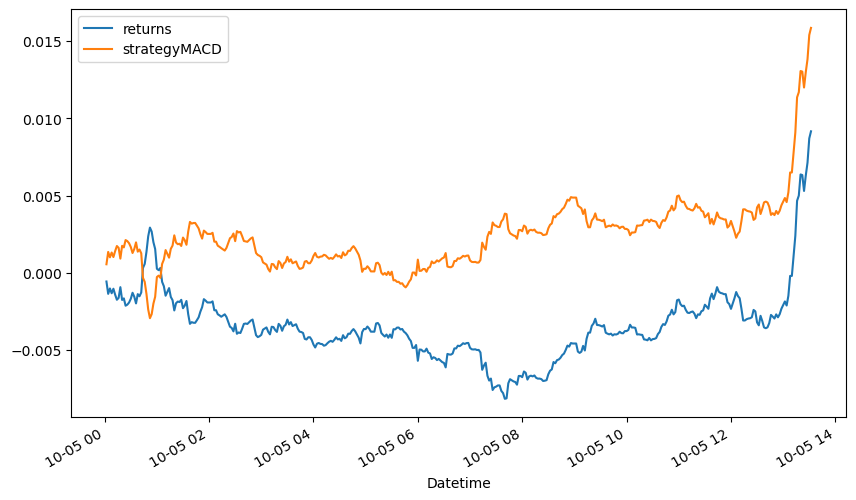

In [38]:
data['positionMACD'] = np.where(data['signalline'] < data['macdline'],1, -1)
data['strategyMACD'] = data['positionMACD'].shift(1) * data['returns']
data[['returns', 'strategyMACD']].cumsum().plot(figsize=(10, 6))
data[['returns', 'strategyMACD']].sum()

Mean Reversion

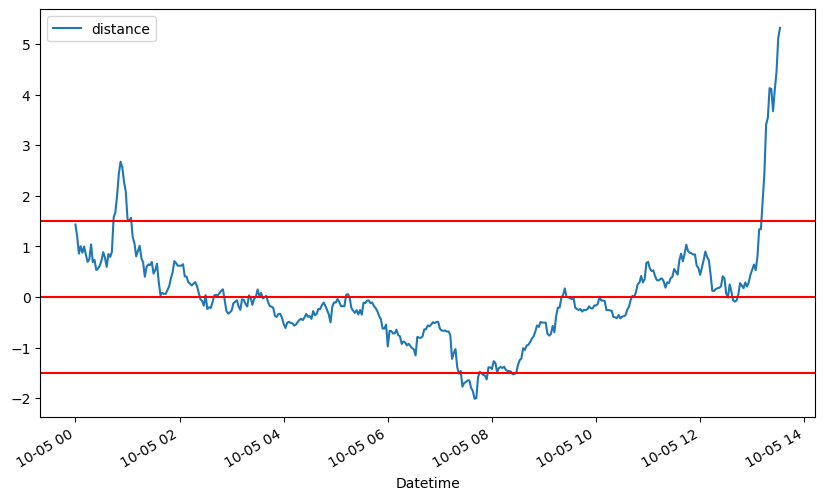

In [39]:
threshold = 1.5
data['distance'] = stats.zscore(data["close"])
data['distance'].dropna().plot(figsize=(10, 6), legend=True)
plt.axhline(threshold, color='r')
plt.axhline(-threshold, color='r')
plt.axhline(0, color='r')

In [40]:
data['positionMR'] = np.where(data['distance'] > threshold,-1, np.nan)
data['positionMR'] = np.where(data['distance'] < -threshold,1, data['positionMR'])
data['positionMR'] = np.where(data['distance'] *data['distance'].shift(1) < 0, 0, data['positionMR'])
data['positionMR'] = data['positionMR'].ffill().fillna(0)
data['strategyMR'] = data['positionMR'].shift(1) * data['returns']

In [41]:
data[['returns', 'strategyMR']].sum()

returns       0.009166
strategyMR   -0.000539
dtype: float64

<Axes: xlabel='Datetime'>

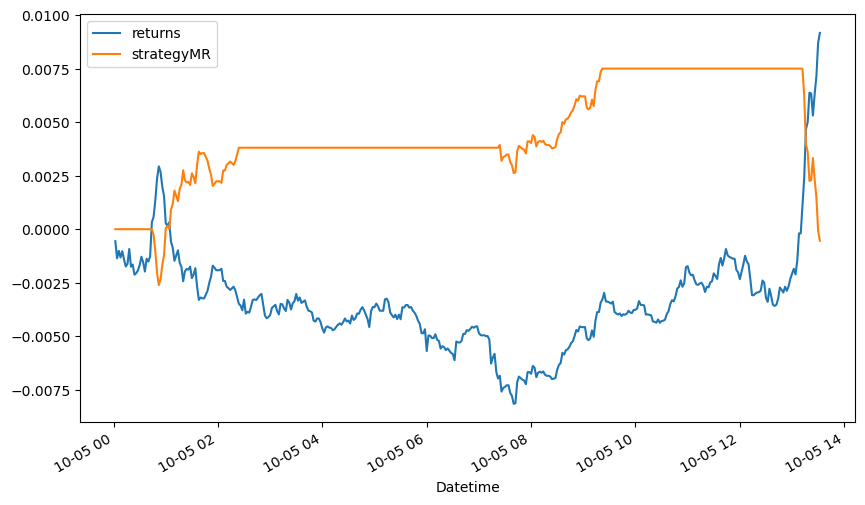

In [42]:
data[['returns', 'strategyMR']].dropna().cumsum().plot(figsize=(10, 6))

<Axes: xlabel='Datetime'>

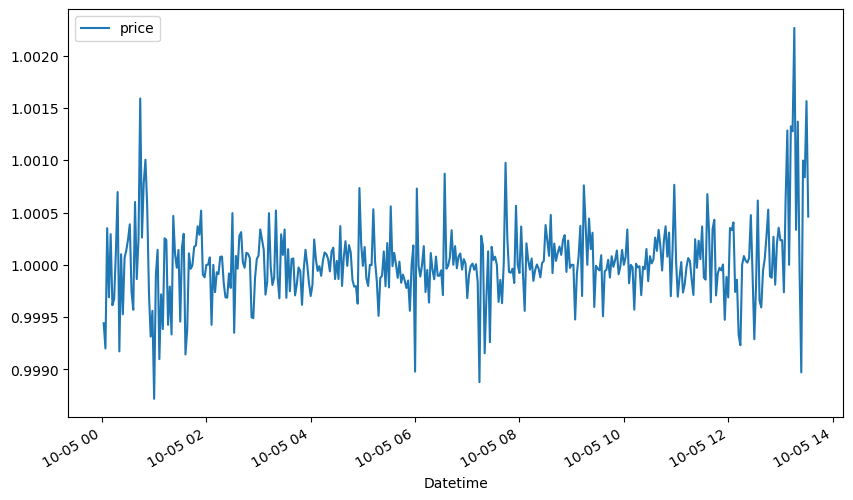

In [43]:
data["price"].plot(figsize=(10, 6), legend=True)

LSTM

In [44]:
import torch
import torch.nn as nn
from torch.autograd import Variable

In [45]:
device= 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cuda:0'

In [46]:
from copy import deepcopy as dc
def prepareforlstm(df,loookback):
    df["ema_10"]=ta.EMA(df["close"],10)
    df["ema_20"]=ta.EMA(df["close"],20)
    df["ema_50"]=ta.EMA(df["close"],50)
    df=pd.DataFrame(df[["close","ema_10","ema_20","ema_50"]])
    df['ema_10(t-1)']=df["ema_10"].shift(1)
    df['ema_20(t-1)']=df["ema_20"].shift(1)
    df['ema_50(t-1)']=df["ema_50"].shift(1)
    df=df.drop("ema_10",axis=1)
    df=df.drop("ema_20",axis=1)
    df=df.drop("ema_50",axis=1)
    df=dc(df)
    for i in range(1,loookback+1):
        df[f'close(t-{i})']=df["close"].shift(i)
    df.dropna(inplace=True)
    return df

In [47]:
lookback=7

In [48]:
shifted_df=prepareforlstm(data,lookback)
shifted_df

,close,ema_10(t-1),ema_20(t-1),ema_50(t-1),close(t-1),close(t-2),close(t-3),close(t-4),close(t-5),close(t-6),close(t-7)
Datetime,,,,,,,,,,,
2023-10-05 01:40:00+00:00,27702.492188,27730.720480,27746.083647,27764.956992,27699.457031,27716.701172,27740.474609,27732.240234,27727.548828,27742.617188,27738.660156
2023-10-05 01:42:00+00:00,27701.417969,27725.588063,27741.932079,27762.507392,27702.492188,27699.457031,27716.701172,27740.474609,27732.240234,27727.548828,27742.617188
2023-10-05 01:44:00+00:00,27701.302734,27721.193501,27738.073592,27760.111728,27701.417969,27702.492188,27699.457031,27716.701172,27740.474609,27732.240234,27727.548828
2023-10-05 01:46:00+00:00,27706.058594,27717.576998,27734.571606,27757.805493,27701.302734,27701.417969,27702.492188,27699.457031,27716.701172,27740.474609,27732.240234
2023-10-05 01:48:00+00:00,27711.187500,27715.482743,27731.856081,27755.776203,27706.058594,27701.302734,27701.417969,27702.492188,27699.457031,27716.701172,27740.474609
...,...,...,...,...,...,...,...,...,...,...,...
2023-10-05 13:24:00+00:00,27938.296875,27873.373744,27817.336201,27764.990539,27967.060547,27968.187500,27929.939453,27920.593750,27857.490234,27821.992188,27785.185547
2023-10-05 13:26:00+00:00,27966.154297,27885.177949,27828.856265,27771.786866,27938.296875,27967.060547,27968.187500,27929.939453,27920.593750,27857.490234,27821.992188
2023-10-05 13:28:00+00:00,27989.576172,27899.900922,27841.932268,27779.409118,27966.154297,27938.296875,27967.060547,27968.187500,27929.939453,27920.593750,27857.490234


In [49]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler(feature_range=(0,1))
shifted_df_as_np=scalar.fit_transform(shifted_df)
shifted_df_as_np

array([[0.28540867, 0.41560441, 0.53814313, ..., 0.40290196, 0.44029117,
        0.47561041],
       [0.28317596, 0.4010999 , 0.52302183, ..., 0.41454278, 0.40290196,
        0.48645856],
       [0.28293645, 0.38868061, 0.50896801, ..., 0.43497478, 0.41454278,
        0.44514885],
       ...,
       [0.88209696, 0.89371822, 0.88725368, ..., 0.90509491, 0.88190537,
        0.80138145],
       [0.97312635, 0.93979595, 0.9384694 , ..., 1.        , 0.90509491,
        0.97437888],
       [1.        , 1.        , 1.        , ..., 0.99720369, 1.        ,
        1.        ]])

In [50]:
x=shifted_df_as_np[:,1:]
y=shifted_df_as_np[:,0]
x.shape,y.shape

((356, 10), (356,))

In [51]:
split_index=int(len(x)*0.90)
split_index2=int(len(x)*0.95)

In [52]:
lookback=lookback+3

In [53]:
x_train=torch.tensor(x[:split_index].reshape((-1,lookback,1))).float()
x_val=torch.tensor(x[split_index:split_index2].reshape((-1,lookback,1))).float()
x_test=torch.tensor(x[split_index2:].reshape((-1,lookback,1))).float()
y_train=torch.tensor(y[:split_index].reshape((-1,1))).float()
y_val=torch.tensor(y[split_index:split_index2].reshape((-1,1))).float()
y_test=torch.tensor(y[split_index2:].reshape((-1,1))).float()
x_train.shape,x_val.shape,x_test.shape,y_train.shape,y_val.shape,y_test.shape

(torch.Size([320, 10, 1]),
 torch.Size([18, 10, 1]),
 torch.Size([18, 10, 1]),
 torch.Size([320, 1]),
 torch.Size([18, 1]),
 torch.Size([18, 1]))

In [54]:
from torch.utils.data import Dataset,DataLoader
class TimeSeriesDataset(Dataset):
    def __init__(self,x,y):
        self.x=x
        self.y=y
    def __len__(self):
        return len(self.x)
    def __getitem__(self,i):
        return self.x[i],self.y[i]
    

In [55]:
trainds=TimeSeriesDataset(x_train,y_train)
testds=TimeSeriesDataset(x_test,y_test)
valds=TimeSeriesDataset(x_val,y_val)

In [56]:
batch_size=16
train_loader=DataLoader(trainds,batch_size=batch_size,shuffle=True)
test_loader=DataLoader(testds,batch_size=batch_size,shuffle=True)
val_loader=DataLoader(valds,batch_size=batch_size,shuffle=True)

In [57]:
import torch.nn as nn
class LSTM(nn.Module):
    def __init__(self,input_size,hidden_size,num_lay):
        super().__init__()
        self.hidden_size=hidden_size
        self.num_lay=num_lay
        self.lstm=nn.LSTM(input_size,hidden_size,num_lay,batch_first=True)
        self.fc=nn.Linear(hidden_size,1)
    def forward(self,x):
        batch_size=x.size(0)
        h0=torch.zeros(self.num_lay,batch_size,self.hidden_size).to(device)
        c0=torch.zeros(self.num_lay,batch_size,self.hidden_size).to(device)
        out,_=self.lstm(x,(h0,c0))
        out=self.fc(out[:,-1,:])
        return out

In [58]:
model=LSTM(1,4,1)
model.to(device)
model

LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)

In [59]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch*1}')
    running_loss=0.0
    for batch_index,batch in enumerate(train_loader):
        x_batch,y_batch=batch[0].to(device),batch[1].to(device)
        output=model(x_batch)
        loss=loss_function(output,y_batch)
        running_loss+=loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch_index %100==99:
            avg_loss_across_batches=running_loss/100
            print('Batch {0},loss:{1:.3f}'.format(batch_index+1,avg_loss_across_batches))
            running_loss=0.0
    print()

In [60]:
def validate_one_epoch():
    model.train(False)
    running_lose=0.0
    for batch_index,batch in enumerate(val_loader):
        x_batch,y_batch=batch[0].to(device),batch[1].to(device)
        with torch.no_grad():
            output=model(x_batch)
            loss=loss_function(output,y_batch)
            running_lose+=loss.item()
    avg_loss_across_batches=running_lose/len(test_loader)
    print('Val loss {0:.3f}'.format(avg_loss_across_batches))
    print('*************************************')
    print()

In [61]:
learning_rate=0.01
num_epochs=10
loss_function=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)
for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch: 0

Val loss 0.000
*************************************

Epoch: 1

Val loss 0.003
*************************************

Epoch: 2

Val loss 0.003
*************************************

Epoch: 3

Val loss 0.003
*************************************

Epoch: 4

Val loss 0.003
*************************************

Epoch: 5

Val loss 0.001
*************************************

Epoch: 6

Val loss 0.001
*************************************

Epoch: 7

Val loss 0.001
*************************************

Epoch: 8

Val loss 0.001
*************************************

Epoch: 9

Val loss 0.001
*************************************



In [62]:
with torch.no_grad():
    predicted=model(x_train.to(device)).to('cpu').numpy()
    

In [63]:
torch.cuda.empty_cache()

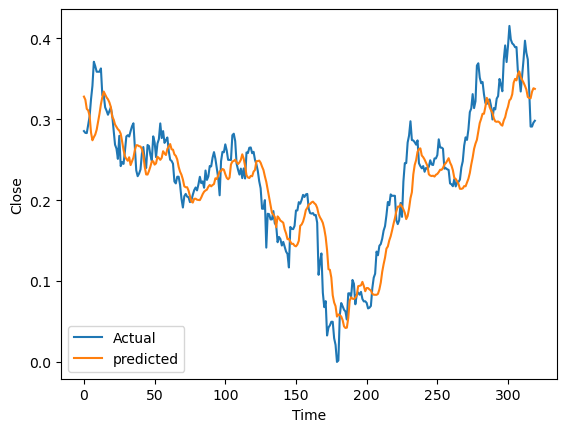

In [64]:
plt.plot(y_train,label="Actual")
plt.plot(predicted,label='predicted')
plt.xlabel("Time")
plt.ylabel("Close")
plt.legend()
plt.show()

In [65]:
train_prediction=predicted.flatten()
dummies=np.zeros((x_train.shape[0],lookback+1))
dummies[:,0]=train_prediction
dummies=scalar.inverse_transform(dummies)
train_prediction=dc(dummies[:,0])
train_prediction

array([27722.9995279 , 27721.13310903, 27715.69367221, 27714.80068299,
       27711.64016246, 27701.60822195, 27697.01666461, 27698.85463539,
       27700.43410702, 27703.29242387, 27707.86187084, 27712.78711977,
       27718.40682346, 27722.71332627, 27726.01192905, 27724.29730028,
       27722.53959787, 27721.37543405, 27719.57468669, 27716.88049127,
       27711.0127844 , 27709.41716733, 27706.39495846, 27704.96406505,
       27703.61163332, 27702.77717492, 27700.93992108, 27696.3641077 ,
       27691.3274036 , 27687.42404933, 27685.93293313, 27684.83826927,
       27686.9322299 , 27682.28103767, 27684.48576522, 27686.7132197 ,
       27691.12234501, 27694.10193908, 27694.02861067, 27693.48425403,
       27693.32813363, 27691.79345627, 27688.26695326, 27681.29265269,
       27676.70890998, 27676.63257043, 27678.72789325, 27681.3320556 ,
       27684.46012752, 27684.53282503, 27682.54501422, 27683.28908109,
       27687.24517331, 27686.48209325, 27685.37866841, 27686.54661766,
      

In [66]:
dummies=np.zeros((x_train.shape[0],lookback+1))
dummies[:,0]=y_train.flatten()
dummies=scalar.inverse_transform(dummies)
new_y_train=dc(dummies[:,0])
new_y_train

array([27702.49219208, 27701.41797529, 27701.30273469, 27706.05859986,
       27711.18750218, 27721.39843342, 27729.38281351, 27743.74804164,
       27741.12304507, 27737.80273341, 27737.80273341, 27737.80273341,
       27739.77733822, 27723.85741584, 27723.85741584, 27716.61327416,
       27714.64258383, 27712.21484557, 27714.332035  , 27716.52734198,
       27711.6874947 , 27703.07226657, 27694.3750064 , 27692.08788835,
       27685.96483687, 27699.65039348, 27681.64648307, 27683.99413937,
       27682.97851791, 27690.66014946, 27699.32031526, 27700.02539504,
       27699.24218336, 27702.43358958, 27705.35352008, 27707.13476672,
       27693.22655786, 27679.12109069, 27675.66405897, 27677.19726659,
       27679.64257701, 27689.02148743, 27693.00390561, 27685.10937218,
       27680.55859427, 27694.21679254, 27693.63281791, 27688.29492818,
       27684.97655942, 27699.35350948, 27695.86133346, 27686.98437997,
       27695.07422164, 27697.69140358, 27707.05859924, 27698.3281305 ,
      

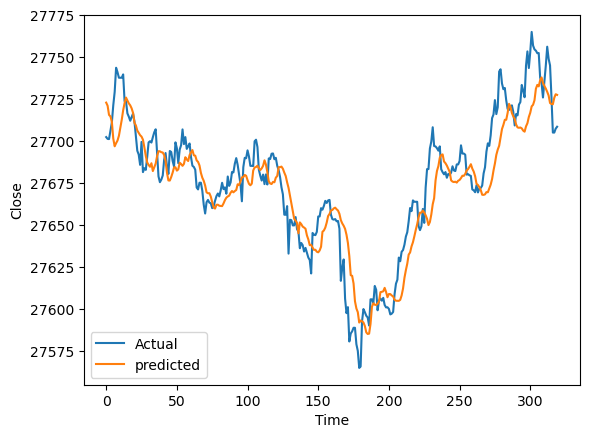

In [67]:
plt.plot(new_y_train,label="Actual")
plt.plot(train_prediction,label='predicted')
plt.xlabel("Time")
plt.ylabel("Close")
plt.legend()
plt.show()

In [68]:
test_prediction=model(x_test.to(device)).detach().cpu().numpy().flatten()
dummies=np.zeros((x_test.shape[0],lookback+1))
dummies[:,0]=test_prediction.flatten()
dummies=scalar.inverse_transform(dummies)
test_prediction=dc(dummies[:,0])
test_prediction

array([27700.23135697, 27704.69865462, 27704.33367586, 27705.22801292,
       27708.38887758, 27709.68257775, 27715.22000565, 27721.43390751,
       27727.21999816, 27733.67978105, 27740.85833724, 27755.47188399,
       27771.73737046, 27781.71772012, 27797.99344446, 27812.06081354,
       27825.77411566, 27830.22486638])

In [69]:
dummies=np.zeros((x_test.shape[0],lookback+1))
dummies[:,0]=y_test.flatten()
dummies=scalar.inverse_transform(dummies)
new_y_test=dc(dummies[:,0])
new_y_test

array([27726.25586002, 27732.75976327, 27739.30663978, 27732.01367464,
       27749.53906482, 27785.18554892, 27785.18554892, 27821.992182  ,
       27857.49024561, 27920.59374646, 27929.93946265, 27968.18749945,
       27967.06055905, 27938.29686556, 27966.15429214, 27989.57616708,
       28033.37304543, 28046.30273438])

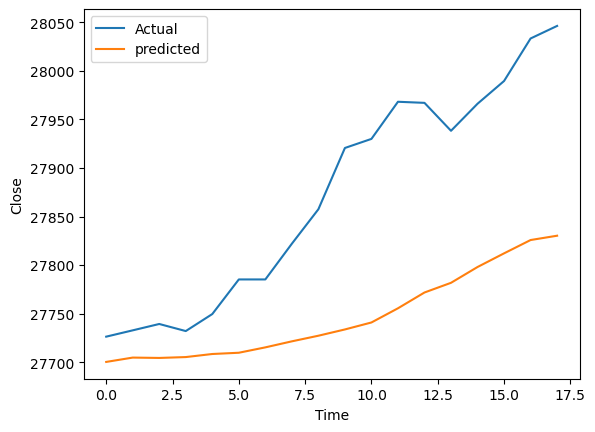

In [70]:
plt.plot(new_y_test,label="Actual")
plt.plot(test_prediction,label='predicted')
plt.xlabel("Time")
plt.ylabel("Close")
plt.legend()
plt.show()

LR

In [71]:
import os
import random
import numpy as np
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
os.environ['PYTHONHASHSEED'] = '0'

/tmp/ipykernel_7650/2447407336.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [72]:
data

,open,high,low,close,adj close,volume,returns,price,emashort,emalong,...,strategyTEMA,macdline,signalline,macdhist,positionMACD,strategyMACD,distance,positionMR,strategyMR,ema_20
Datetime,,,,,,,,,,,,,,,,,,,,,
2023-10-05 00:00:00+00:00,27798.646484,27798.646484,27791.210938,27791.210938,27791.210938,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-1,NaN,1.432505,0.0,NaN,NaN
2023-10-05 00:02:00+00:00,27772.718750,27775.693359,27772.718750,27775.693359,27775.693359,0,-0.000558,0.999442,NaN,NaN,...,0.000558,NaN,NaN,NaN,-1,0.000558,1.195862,0.0,-0.000000,NaN
2023-10-05 00:04:00+00:00,27753.474609,27753.474609,27753.474609,27753.474609,27753.474609,7013376,-0.000800,0.999200,NaN,NaN,...,0.000800,NaN,NaN,NaN,-1,0.000800,0.857026,0.0,-0.000000,NaN
2023-10-05 00:06:00+00:00,27753.460938,27763.191406,27753.460938,27763.191406,27763.191406,0,0.000350,1.000350,NaN,NaN,...,-0.000350,NaN,NaN,NaN,-1,-0.000350,1.005207,0.0,0.000000,NaN
2023-10-05 00:08:00+00:00,27754.568359,27754.568359,27754.568359,27754.568359,27754.568359,4096,-0.000311,0.999689,NaN,NaN,...,0.000311,NaN,NaN,NaN,-1,0.000311,0.873706,0.0,-0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-05 13:24:00+00:00,27938.296875,27938.296875,27938.296875,27938.296875,27938.296875,32929792,-0.001028,0.998972,27885.177949,27771.786866,...,-0.001028,60.666679,38.771210,21.895469,1,-0.001028,3.675567,-1.0,0.001028,27828.856265
2023-10-05 13:26:00+00:00,27966.888672,27966.888672,27966.154297,27966.154297,27966.154297,19507200,0.000997,1.000997,27899.900922,27779.409118,...,0.000997,63.811570,43.779282,20.032288,1,0.000997,4.100393,-1.0,-0.000997,27841.932268
2023-10-05 13:28:00+00:00,27989.576172,27989.576172,27989.576172,27989.576172,27989.576172,29193216,0.000838,1.000838,27916.205513,27787.650963,...,0.000838,67.416731,48.506772,18.909959,1,0.000838,4.457577,-1.0,-0.000838,27855.993592


In [73]:
from copy import deepcopy as dc
def prepareforlstm(df,loookback):
    df=pd.DataFrame(df["close"])
    df=dc(df)
    for i in range(1,loookback+1):
        df[f'close(t-{i})']=df["close"].shift(i)
    df.dropna(inplace=True)
    return df

In [74]:
lookback=3

In [75]:
shifted_df=prepareforlstm(data,lookback)
shifted_df

,close,close(t-1),close(t-2),close(t-3)
Datetime,,,,
2023-10-05 00:06:00+00:00,27763.191406,27753.474609,27775.693359,27791.210938
2023-10-05 00:08:00+00:00,27754.568359,27763.191406,27753.474609,27775.693359
2023-10-05 00:10:00+00:00,27762.691406,27754.568359,27763.191406,27753.474609
2023-10-05 00:12:00+00:00,27751.976562,27762.691406,27754.568359,27763.191406
2023-10-05 00:14:00+00:00,27742.880859,27751.976562,27762.691406,27754.568359
...,...,...,...,...
2023-10-05 13:24:00+00:00,27938.296875,27967.060547,27968.187500,27929.939453
2023-10-05 13:26:00+00:00,27966.154297,27938.296875,27967.060547,27968.187500
2023-10-05 13:28:00+00:00,27989.576172,27966.154297,27938.296875,27967.060547


In [76]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler(feature_range=(0,1))
shifted_df_as_np=scalar.fit_transform(shifted_df)
shifted_df_as_np

array([[0.41156866, 0.4021809 , 0.49603763, 0.5608671 ],
       [0.39364613, 0.42293445, 0.44368459, 0.52236325],
       [0.41052944, 0.40451697, 0.46657984, 0.46723175],
       ...,
       [0.88209696, 0.85643131, 0.87917292, 0.99720369],
       [0.97312635, 0.90645675, 0.9448121 , 0.92583223],
       [1.        , 1.        , 1.        , 0.994955  ]])

In [77]:
x=shifted_df_as_np[:,1:]
y=shifted_df_as_np[:,0]
x.shape,y.shape

((403, 3), (403,))

In [78]:

split_index2=int(len(x)*0.95)

In [79]:
x_train=x[:split_index2]
x_test=x[split_index2:]
y_train=y[:split_index2]
y_test=y[split_index2:]
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((382, 3), (21, 3), (382,), (21,))

In [80]:
reg = np.linalg.lstsq(x_train,y_train, rcond=None)[0]

In [81]:
pred= np.dot(x_test, reg)

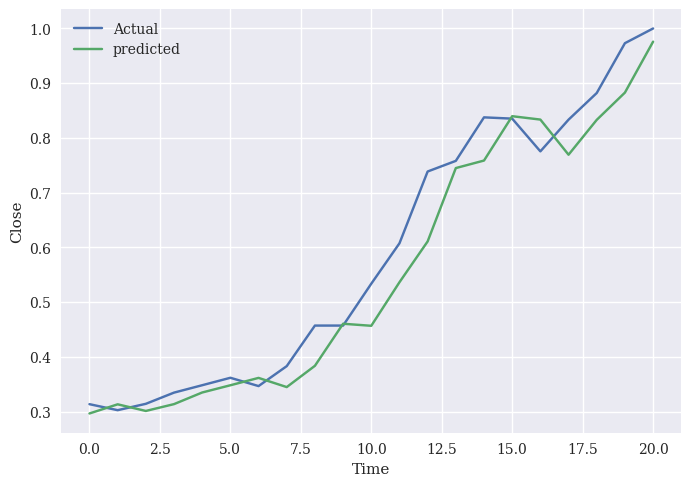

In [82]:
plt.plot(y_test,label="Actual")
plt.plot(pred,label='predicted')
plt.xlabel("Time")
plt.ylabel("Close")
plt.legend()
plt.show()

Predict future market direction

In [83]:
data

,open,high,low,close,adj close,volume,returns,price,emashort,emalong,...,strategyTEMA,macdline,signalline,macdhist,positionMACD,strategyMACD,distance,positionMR,strategyMR,ema_20
Datetime,,,,,,,,,,,,,,,,,,,,,
2023-10-05 00:00:00+00:00,27798.646484,27798.646484,27791.210938,27791.210938,27791.210938,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-1,NaN,1.432505,0.0,NaN,NaN
2023-10-05 00:02:00+00:00,27772.718750,27775.693359,27772.718750,27775.693359,27775.693359,0,-0.000558,0.999442,NaN,NaN,...,0.000558,NaN,NaN,NaN,-1,0.000558,1.195862,0.0,-0.000000,NaN
2023-10-05 00:04:00+00:00,27753.474609,27753.474609,27753.474609,27753.474609,27753.474609,7013376,-0.000800,0.999200,NaN,NaN,...,0.000800,NaN,NaN,NaN,-1,0.000800,0.857026,0.0,-0.000000,NaN
2023-10-05 00:06:00+00:00,27753.460938,27763.191406,27753.460938,27763.191406,27763.191406,0,0.000350,1.000350,NaN,NaN,...,-0.000350,NaN,NaN,NaN,-1,-0.000350,1.005207,0.0,0.000000,NaN
2023-10-05 00:08:00+00:00,27754.568359,27754.568359,27754.568359,27754.568359,27754.568359,4096,-0.000311,0.999689,NaN,NaN,...,0.000311,NaN,NaN,NaN,-1,0.000311,0.873706,0.0,-0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-05 13:24:00+00:00,27938.296875,27938.296875,27938.296875,27938.296875,27938.296875,32929792,-0.001028,0.998972,27885.177949,27771.786866,...,-0.001028,60.666679,38.771210,21.895469,1,-0.001028,3.675567,-1.0,0.001028,27828.856265
2023-10-05 13:26:00+00:00,27966.888672,27966.888672,27966.154297,27966.154297,27966.154297,19507200,0.000997,1.000997,27899.900922,27779.409118,...,0.000997,63.811570,43.779282,20.032288,1,0.000997,4.100393,-1.0,-0.000997,27841.932268
2023-10-05 13:28:00+00:00,27989.576172,27989.576172,27989.576172,27989.576172,27989.576172,29193216,0.000838,1.000838,27916.205513,27787.650963,...,0.000838,67.416731,48.506772,18.909959,1,0.000838,4.457577,-1.0,-0.000838,27855.993592


In [84]:
from copy import deepcopy as dc
def prepareforlstm(df,loookback):
    df=pd.DataFrame(df["returns"])
    df=dc(df)
    for i in range(1,loookback+1):
        df[f'returns(t-{i})']=df["returns"].shift(i)
    df.dropna(inplace=True)
    return df

In [85]:
lookback=3

In [86]:
shifted_df=prepareforlstm(data,lookback)
shifted_df

,returns,returns(t-1),returns(t-2),returns(t-3)
Datetime,,,,
2023-10-05 00:08:00+00:00,-0.000311,0.000350,-0.000800,-0.000558
2023-10-05 00:10:00+00:00,0.000293,-0.000311,0.000350,-0.000800
2023-10-05 00:12:00+00:00,-0.000386,0.000293,-0.000311,0.000350
2023-10-05 00:14:00+00:00,-0.000328,-0.000386,0.000293,-0.000311
2023-10-05 00:16:00+00:00,0.000120,-0.000328,-0.000386,0.000293
...,...,...,...,...
2023-10-05 13:24:00+00:00,-0.001028,-0.000040,0.001369,0.000335
2023-10-05 13:26:00+00:00,0.000997,-0.001028,-0.000040,0.001369
2023-10-05 13:28:00+00:00,0.000838,0.000997,-0.001028,-0.000040


In [87]:
shifted_df_as_np=np.array(shifted_df)
shifted_df_as_np

array([[-3.10592783e-04,  3.50111005e-04, -7.99935026e-04,
        -5.58362792e-04],
       [ 2.92674228e-04, -3.10592783e-04,  3.50111005e-04,
        -7.99935026e-04],
       [-3.85943985e-04,  2.92674228e-04, -3.10592783e-04,
         3.50111005e-04],
       ...,
       [ 8.37507894e-04,  9.97105228e-04, -1.02848391e-03,
        -4.02941065e-05],
       [ 1.56475663e-03,  8.37507894e-04,  9.97105228e-04,
        -1.02848391e-03],
       [ 4.61224822e-04,  1.56475663e-03,  8.37507894e-04,
         9.97105228e-04]])

In [88]:
x=shifted_df_as_np[:,1:]
y=shifted_df_as_np[:,0]
x.shape,y.shape

((402, 3), (402,))

In [89]:

split_index2=int(len(x)*0.95)

In [90]:
x_train=x[:split_index2]
x_test=x[split_index2:]
y_train=y[:split_index2]
y_test=y[split_index2:]
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((381, 3), (21, 3), (381,), (21,))

In [91]:
reg = np.linalg.lstsq(x_train,np.sign(y_train), rcond=None)[0]

In [92]:
pred=np.sign(np.dot(x_test, reg))

In [93]:
pd.DataFrame(pred).value_counts()

 1.0    12
-1.0     9
dtype: int64

In [94]:
np.sign((y_test*pred))

array([-1., -1., -1.,  1.,  1., -1.,  1., -1.,  1.,  0., -1.,  1.,  1.,
        1., -1., -1.,  1., -1.,  1.,  1.,  1.])

In [95]:
hits = pd.DataFrame(np.sign(y_test*pred)).value_counts()

In [96]:
hits

 1.0    11
-1.0     9
 0.0     1
dtype: int64

In [97]:
hits.values[0] / sum(hits)

0.5238095238095238

Machine learning

In [98]:
from sklearn import linear_model

In [99]:
lm = linear_model.LogisticRegression(C=1e7,solver='lbfgs',multi_class='auto',max_iter=1000)


In [100]:
from copy import deepcopy as dc
def prepareforlstm(df,loookback):
    df=pd.DataFrame(df["returns"])
    df=dc(df)
    for i in range(1,loookback+1):
        df[f'returns(t-{i})']=df["returns"].shift(i)
    df.dropna(inplace=True)
    return df

In [101]:
lookback=3

In [102]:
shifted_df=prepareforlstm(data,lookback)
shifted_df

,returns,returns(t-1),returns(t-2),returns(t-3)
Datetime,,,,
2023-10-05 00:08:00+00:00,-0.000311,0.000350,-0.000800,-0.000558
2023-10-05 00:10:00+00:00,0.000293,-0.000311,0.000350,-0.000800
2023-10-05 00:12:00+00:00,-0.000386,0.000293,-0.000311,0.000350
2023-10-05 00:14:00+00:00,-0.000328,-0.000386,0.000293,-0.000311
2023-10-05 00:16:00+00:00,0.000120,-0.000328,-0.000386,0.000293
...,...,...,...,...
2023-10-05 13:24:00+00:00,-0.001028,-0.000040,0.001369,0.000335
2023-10-05 13:26:00+00:00,0.000997,-0.001028,-0.000040,0.001369
2023-10-05 13:28:00+00:00,0.000838,0.000997,-0.001028,-0.000040


In [103]:
shifted_df_as_np=np.array(shifted_df)
shifted_df_as_np

array([[-3.10592783e-04,  3.50111005e-04, -7.99935026e-04,
        -5.58362792e-04],
       [ 2.92674228e-04, -3.10592783e-04,  3.50111005e-04,
        -7.99935026e-04],
       [-3.85943985e-04,  2.92674228e-04, -3.10592783e-04,
         3.50111005e-04],
       ...,
       [ 8.37507894e-04,  9.97105228e-04, -1.02848391e-03,
        -4.02941065e-05],
       [ 1.56475663e-03,  8.37507894e-04,  9.97105228e-04,
        -1.02848391e-03],
       [ 4.61224822e-04,  1.56475663e-03,  8.37507894e-04,
         9.97105228e-04]])

In [104]:
x=shifted_df_as_np[:,1:]
y=shifted_df_as_np[:,0]
x.shape,y.shape

((402, 3), (402,))

In [105]:

split_index2=int(len(x)*0.95)

In [106]:
x_train=x[:split_index2]
x_test=x[split_index2:]
y_train=y[:split_index2]
y_test=y[split_index2:]
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((381, 3), (21, 3), (381,), (21,))

In [107]:
lm.fit(x_train,np.sign(y_train))

LogisticRegression(C=10000000.0, max_iter=1000)

In [108]:
pred=lm.predict(x_test)

In [109]:
pd.DataFrame(pred).value_counts()

 1.0    11
-1.0    10
dtype: int64

In [110]:
np.sign((y_test*pred))

array([-1., -1., -1.,  1.,  1., -1.,  1., -1.,  1.,  0., -1.,  1., -1.,
        1., -1., -1.,  1., -1.,  1.,  1.,  1.])

In [111]:
hits

 1.0    11
-1.0     9
 0.0     1
dtype: int64

In [112]:
hits.values[0] / sum(hits)

0.5238095238095238

Deep learning

In [113]:
import torch
import torch.nn as nn
from torch.autograd import Variable
device= 'cuda:0' if torch.cuda.is_available() else 'cpu'
device
from copy import deepcopy as dc
from copy import deepcopy as dc
def prepareforlstm(df,loookback):
    df=pd.DataFrame(df[["close","returns"]])
    df=dc(df)
    df['direction'] = np.sign(df['returns']).shift(1)
    df['momentum'] = df['returns'].rolling(5).mean().shift(1)
    df['volatility'] = df['returns'].rolling(20).std().shift(1)
    df['direction'] = np.sign(df['returns'])
    df['distance'] = (df['close'] - df['close'].rolling(50).mean()).shift(1)
    for i in range(1,loookback+1):
        df[f'returns(t-{i})']=df["returns"].shift(i)
    df.dropna(inplace=True)
    return df
lookback=7
shifted_df=prepareforlstm(data,lookback)
shifted_df


,close,returns,direction,momentum,volatility,distance,returns(t-1),returns(t-2),returns(t-3),returns(t-4),returns(t-5),returns(t-6),returns(t-7)
Datetime,,,,,,,,,,,,,
2023-10-05 01:40:00+00:00,27702.492188,0.000110,1.0,-0.000311,0.000486,-65.499961,-0.000622,-0.000857,0.000297,0.000169,-0.000543,0.000143,-0.000028
2023-10-05 01:42:00+00:00,27701.417969,-0.000039,-1.0,-0.000181,0.000425,-60.690430,0.000110,-0.000622,-0.000857,0.000297,0.000169,-0.000543,0.000143
2023-10-05 01:44:00+00:00,27701.302734,-0.000004,-1.0,-0.000222,0.000426,-60.279141,-0.000039,0.000110,-0.000622,-0.000857,0.000297,0.000169,-0.000543
2023-10-05 01:46:00+00:00,27706.058594,0.000172,1.0,-0.000283,0.000421,-59.350937,-0.000004,-0.000039,0.000110,-0.000622,-0.000857,0.000297,0.000169
2023-10-05 01:48:00+00:00,27711.187500,0.000185,1.0,-0.000077,0.000392,-53.452422,0.000172,-0.000004,-0.000039,0.000110,-0.000622,-0.000857,0.000297
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-05 13:24:00+00:00,27938.296875,-0.001028,-1.0,0.001041,0.000670,217.617422,-0.000040,0.001369,0.000335,0.002265,0.001276,0.001325,0.000000
2023-10-05 13:26:00+00:00,27966.154297,0.000997,1.0,0.000580,0.000751,185.388867,-0.001028,-0.000040,0.001369,0.000335,0.002265,0.001276,0.001325
2023-10-05 13:28:00+00:00,27989.576172,0.000838,1.0,0.000326,0.000761,209.061641,0.000997,-0.001028,-0.000040,0.001369,0.000335,0.002265,0.001276


Epoch: 0

Val loss 1.029
*************************************

Epoch: 1

Val loss 1.040
*************************************

Epoch: 2

Val loss 1.045
*************************************

Epoch: 3

Val loss 1.043
*************************************

Epoch: 4

Val loss 1.041
*************************************

Epoch: 5

Val loss 1.043
*************************************

Epoch: 6

Val loss 1.027
*************************************

Epoch: 7

Val loss 1.049
*************************************

Epoch: 8

Val loss 1.034
*************************************

Epoch: 9

Val loss 1.041
*************************************

Epoch: 10

Val loss 1.044
*************************************

Epoch: 11

Val loss 1.035
*************************************

Epoch: 12

Val loss 1.034
*************************************

Epoch: 13

Val loss 1.023
*************************************

Epoch: 14

Val loss 1.013
*************************************

Epoch: 15

Val loss 1.026
*********

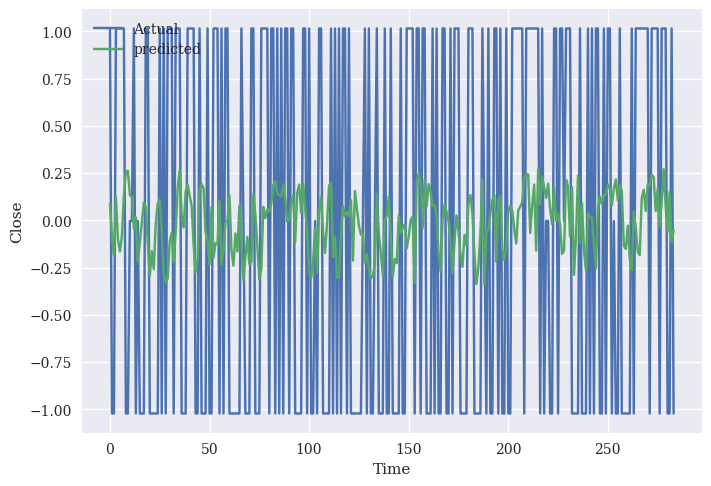

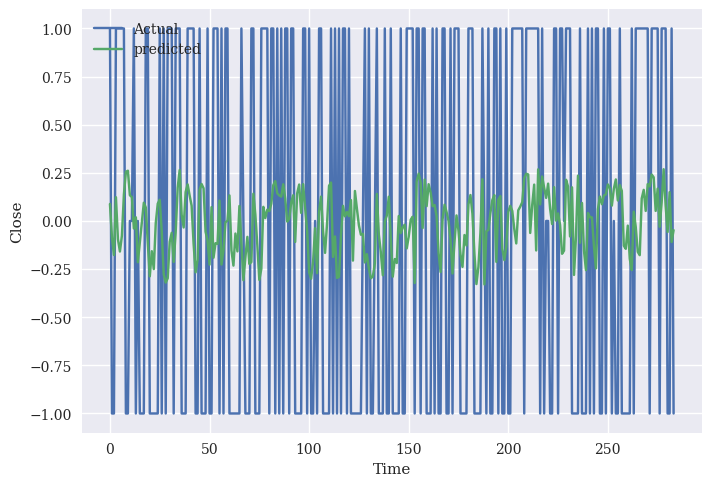

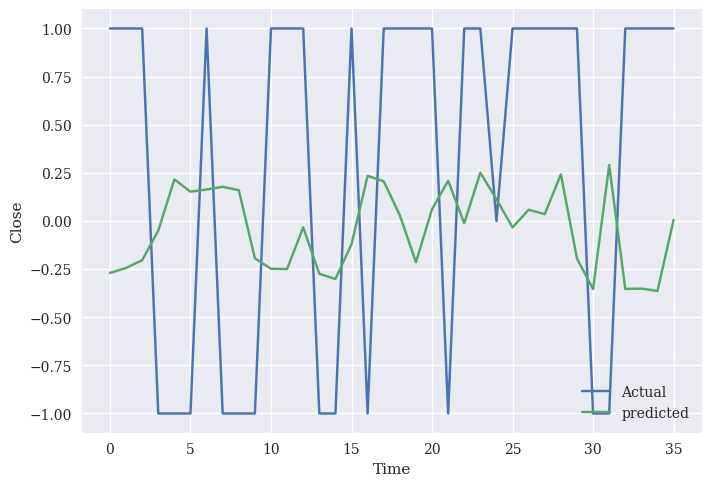

In [114]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scalar=StandardScaler()
shifted_df2=shifted_df.drop(["close","returns"],axis=1)
shifted_df_as_np=scalar.fit_transform(shifted_df2)
"""shifted_df_as_np=np.array(shifted_df2)"""
shifted_df_as_np
x=shifted_df_as_np[:,1:]
y=shifted_df_as_np[:,0]
x.shape,y.shape
split_index=int(len(x)*0.80)
split_index2=int(len(x)*0.90)
lookback=x.shape[1]
x_train=torch.tensor(x[:split_index].reshape((-1,lookback,1))).float()
x_val=torch.tensor(x[split_index:split_index2].reshape((-1,lookback,1))).float()
x_test=torch.tensor(x[split_index2:].reshape((-1,lookback,1))).float()
y_train=torch.tensor(y[:split_index].reshape((-1,1))).float()
y_val=torch.tensor(y[split_index:split_index2].reshape((-1,1))).float()
y_test=torch.tensor(y[split_index2:].reshape((-1,1))).float()
x_train.shape,x_val.shape,x_test.shape,y_train.shape,y_val.shape,y_test.shape
from torch.utils.data import Dataset,DataLoader
class TimeSeriesDataset(Dataset):
    def __init__(self,x,y):
        self.x=x
        self.y=y
    def __len__(self):
        return len(self.x)
    def __getitem__(self,i):
        return self.x[i],self.y[i]
    
trainds=TimeSeriesDataset(x_train,y_train)
testds=TimeSeriesDataset(x_test,y_test)
valds=TimeSeriesDataset(x_val,y_val)
batch_size=16
train_loader=DataLoader(trainds,batch_size=batch_size,shuffle=True)
test_loader=DataLoader(testds,batch_size=batch_size,shuffle=True)
val_loader=DataLoader(valds,batch_size=batch_size,shuffle=True)
import torch.nn as nn
class LSTM(nn.Module):
    def __init__(self,input_size,hidden_size,num_lay):
        super().__init__()
        self.hidden_size=hidden_size
        self.num_lay=num_lay
        self.lstm=nn.LSTM(input_size,hidden_size,num_lay,batch_first=True)
        self.fc=nn.Linear(hidden_size,1)
    def forward(self,x):
        batch_size=x.size(0)
        h0=torch.zeros(self.num_lay,batch_size,self.hidden_size).to(device)
        c0=torch.zeros(self.num_lay,batch_size,self.hidden_size).to(device)
        out,_=self.lstm(x,(h0,c0))
        out=self.fc(out[:,-1,:])
        return out
model=LSTM(1,4,1)
model.to(device)
model
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch*1}')
    running_loss=0.0
    for batch_index,batch in enumerate(train_loader):
        x_batch,y_batch=batch[0].to(device),batch[1].to(device)
        output=model(x_batch)
        loss=loss_function(output,y_batch)
        running_loss+=loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch_index %100==99:
            avg_loss_across_batches=running_loss/100
            print('Batch {0},loss:{1:.3f}'.format(batch_index+1,avg_loss_across_batches))
            running_loss=0.0
    print()
def validate_one_epoch():
    model.train(False)
    running_lose=0.0
    for batch_index,batch in enumerate(val_loader):
        x_batch,y_batch=batch[0].to(device),batch[1].to(device)
        with torch.no_grad():
            output=model(x_batch)
            loss=loss_function(output,y_batch)
            running_lose+=loss.item()
    avg_loss_across_batches=running_lose/len(test_loader)
    print('Val loss {0:.3f}'.format(avg_loss_across_batches))
    print('*************************************')
    print()
learning_rate=0.01
num_epochs=30
loss_function=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)
for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()
with torch.no_grad():
    predicted=model(x_train.to(device)).to('cpu').numpy()
    
torch.cuda.empty_cache()
plt.plot(y_train,label="Actual")
plt.plot(predicted,label='predicted')
plt.xlabel("Time")
plt.ylabel("Close")
plt.legend()
plt.show()
train_prediction=predicted.flatten()
dummies=np.zeros((x_train.shape[0],lookback+1))
dummies[:,0]=train_prediction
dummies=scalar.inverse_transform(dummies)
train_prediction=dc(dummies[:,0])
train_prediction
dummies=np.zeros((x_train.shape[0],lookback+1))
dummies[:,0]=y_train.flatten()
dummies=scalar.inverse_transform(dummies)
new_y_train=dc(dummies[:,0])
new_y_train
plt.plot(new_y_train,label="Actual")
plt.plot(train_prediction,label='predicted')
plt.xlabel("Time")
plt.ylabel("Close")
plt.legend()
plt.show()
test_prediction=model(x_test.to(device)).detach().cpu().numpy().flatten()
dummies=np.zeros((x_test.shape[0],lookback+1))
dummies[:,0]=test_prediction.flatten()
dummies=scalar.inverse_transform(dummies)
test_prediction=dc(dummies[:,0])
test_prediction
dummies=np.zeros((x_test.shape[0],lookback+1))
dummies[:,0]=y_test.flatten()
dummies=scalar.inverse_transform(dummies)
new_y_test=dc(dummies[:,0])
new_y_test
plt.plot(new_y_test,label="Actual")
plt.plot(test_prediction,label='predicted')
plt.xlabel("Time")
plt.ylabel("Close")
plt.legend()
plt.show()

In [115]:
testdf=shifted_df.iloc[split_index2:,:]
testdf['prediction'] = np.where(test_prediction > 0, 1, -1)
testdf['strategy'] = (testdf['prediction'] *testdf['returns'])


/tmp/ipykernel_7650/2632475440.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf['prediction'] = np.where(test_prediction > 0, 1, -1)
/tmp/ipykernel_7650/2632475440.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf['strategy'] = (testdf['prediction'] *testdf['returns'])


In [116]:
testdf[['returns', 'strategy']].sum().apply(np.exp)

returns     1.012196
strategy    0.995680
dtype: float64

<Axes: xlabel='Datetime'>

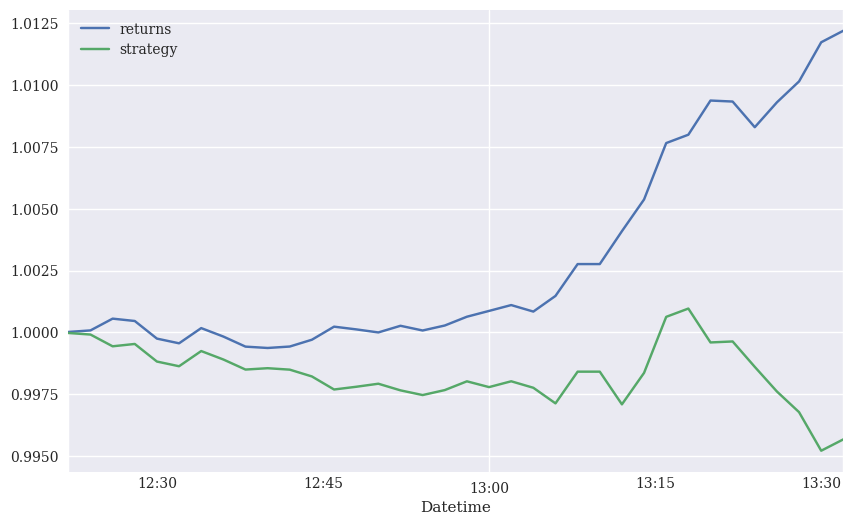

In [117]:
testdf[['returns', 'strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6))

In [118]:
testdf

,close,returns,direction,momentum,volatility,distance,returns(t-1),returns(t-2),returns(t-3),returns(t-4),returns(t-5),returns(t-6),returns(t-7),prediction,strategy
Datetime,,,,,,,,,,,,,,,
2023-10-05 12:22:00+00:00,27709.216797,0.000021,1.0,-0.000263,0.000344,-21.007070,0.000041,0.000084,7.049675e-08,-7.683876e-04,-6.720633e-04,-1.424597e-04,-2.585987e-04,-1,-0.000021
2023-10-05 12:24:00+00:00,27710.962891,0.000063,1.0,-0.000125,0.000331,-20.639883,0.000021,0.000041,8.403211e-05,7.049675e-08,-7.683876e-04,-6.720633e-04,-1.424597e-04,-1,-0.000063
2023-10-05 12:26:00+00:00,27724.130859,0.000475,1.0,0.000042,0.000311,-19.167891,0.000063,0.000021,4.081418e-05,8.403211e-05,7.049675e-08,-7.683876e-04,-6.720633e-04,-1,-0.000475
2023-10-05 12:28:00+00:00,27721.496094,-0.000095,-1.0,0.000137,0.000332,-6.411094,0.000475,0.000063,2.079394e-05,4.081418e-05,8.403211e-05,7.049675e-08,-7.683876e-04,-1,0.000095
2023-10-05 12:30:00+00:00,27701.763672,-0.000712,-1.0,0.000101,0.000332,-9.200117,-0.000095,0.000475,6.301491e-05,2.079394e-05,4.081418e-05,8.403211e-05,7.049675e-08,1,-0.000712
2023-10-05 12:32:00+00:00,27696.498047,-0.000190,-1.0,-0.000050,0.000362,-28.649023,-0.000712,-0.000095,4.751899e-04,6.301491e-05,2.079394e-05,4.081418e-05,8.403211e-05,1,-0.000190
2023-10-05 12:34:00+00:00,27713.525391,0.000615,1.0,-0.000092,0.000363,-33.354766,-0.000190,-0.000712,-9.503510e-05,4.751899e-04,6.301491e-05,2.079394e-05,4.081418e-05,1,0.000615
2023-10-05 12:36:00+00:00,27704.060547,-0.000342,-1.0,0.000019,0.000396,-16.274414,0.000615,-0.000190,-7.118094e-04,-9.503510e-05,4.751899e-04,6.301491e-05,2.079394e-05,1,-0.000342
2023-10-05 12:38:00+00:00,27692.775391,-0.000407,-1.0,-0.000145,0.000387,-25.414922,-0.000342,0.000615,-1.900827e-04,-7.118094e-04,-9.503510e-05,4.751899e-04,6.301491e-05,1,-0.000407


In [119]:
hits


 1.0    11
-1.0     9
 0.0     1
dtype: int64

In [120]:
hits.values[0] / sum(hits)

0.5238095238095238

In [121]:
x.shape[1]

10

In [122]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Conv1D,MaxPooling1D,Flatten,Convolution1D
from tensorflow.keras.optimizers.legacy import Adam


2023-10-05 19:34:47.392260: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-05 19:34:47.661172: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-05 19:34:49.655320: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [123]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2023-10-05 19:34:51.593260: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-05 19:34:51.623170: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-05 19:34:51.623588: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [124]:
shifted_df2

,direction,momentum,volatility,distance,returns(t-1),returns(t-2),returns(t-3),returns(t-4),returns(t-5),returns(t-6),returns(t-7)
Datetime,,,,,,,,,,,
2023-10-05 01:40:00+00:00,1.0,-0.000311,0.000486,-65.499961,-0.000622,-0.000857,0.000297,0.000169,-0.000543,0.000143,-0.000028
2023-10-05 01:42:00+00:00,-1.0,-0.000181,0.000425,-60.690430,0.000110,-0.000622,-0.000857,0.000297,0.000169,-0.000543,0.000143
2023-10-05 01:44:00+00:00,-1.0,-0.000222,0.000426,-60.279141,-0.000039,0.000110,-0.000622,-0.000857,0.000297,0.000169,-0.000543
2023-10-05 01:46:00+00:00,1.0,-0.000283,0.000421,-59.350937,-0.000004,-0.000039,0.000110,-0.000622,-0.000857,0.000297,0.000169
2023-10-05 01:48:00+00:00,1.0,-0.000077,0.000392,-53.452422,0.000172,-0.000004,-0.000039,0.000110,-0.000622,-0.000857,0.000297
...,...,...,...,...,...,...,...,...,...,...,...
2023-10-05 13:24:00+00:00,-1.0,0.001041,0.000670,217.617422,-0.000040,0.001369,0.000335,0.002265,0.001276,0.001325,0.000000
2023-10-05 13:26:00+00:00,1.0,0.000580,0.000751,185.388867,-0.001028,-0.000040,0.001369,0.000335,0.002265,0.001276,0.001325
2023-10-05 13:28:00+00:00,1.0,0.000326,0.000761,209.061641,0.000997,-0.001028,-0.000040,0.001369,0.000335,0.002265,0.001276


In [125]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scalar=StandardScaler()
shifted_df2=shifted_df.drop(["close","returns"],axis=1)
shifted_df_as_np=scalar.fit_transform(shifted_df2)
"""shifted_df_as_np=np.array(shifted_df2)"""
shifted_df_as_np
x=shifted_df_as_np[:,1:]
y=shifted_df_as_np[:,0]
x.shape,y.shape
split_index=int(len(x)*0.80)
split_index2=int(len(x)*0.90)
lookback=x.shape[1]
x_train=torch.tensor(x[:split_index].reshape((-1,lookback,1))).float()
x_val=torch.tensor(x[split_index:split_index2].reshape((-1,lookback,1))).float()
x_test=torch.tensor(x[split_index2:].reshape((-1,lookback,1))).float()
y_train=torch.tensor(y[:split_index].reshape((-1,1))).float()
y_val=torch.tensor(y[split_index:split_index2].reshape((-1,1))).float()
y_test=torch.tensor(y[split_index2:].reshape((-1,1))).float()
x_train.shape,x_val.shape,x_test.shape,y_train.shape,y_val.shape,y_test.shape

(torch.Size([284, 10, 1]),
 torch.Size([36, 10, 1]),
 torch.Size([36, 10, 1]),
 torch.Size([284, 1]),
 torch.Size([36, 1]),
 torch.Size([36, 1]))

In [126]:
pd.DataFrame(shifted_df3,columns=shifted_df2.columns.tolist())

NameError: name 'shifted_df3' is not defined

In [ ]:
x_train=np.array(shifted_df2.iloc[:split_index,1:]).reshape(-1,10,1)
x_val=np.array(shifted_df2.iloc[split_index:split_index2,1:]).reshape(-1,10,1)
x_test=np.array(shifted_df2.iloc[split_index2:,1:]).reshape(-1,10,1)

In [ ]:
y_train=np.array(shifted_df2.iloc[:split_index,0]).reshape(-1,1)
y_val=np.array(shifted_df2.iloc[split_index:split_index2,0]).reshape(-1,1)
y_test=np.array(shifted_df2.iloc[split_index2:,0]).reshape(-1,1)

In [ ]:
def set_seeds(seed=100):
    random.seed(seed)
    np.random.seed(seed)

In [ ]:

n_steps = x_train.shape[1]
n_features = x_train.shape[2]
gpu_device = tf.config.list_physical_devices('GPU')[0]

with tf.device('/GPU:0'):
    set_seeds()
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(n_steps, )))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1,activation='sigmoid'))

In [ ]:

n_steps = x_train.shape[1]
n_features = x_train.shape[2]
gpu_device = tf.config.list_physical_devices('GPU')[0]

with tf.device('/GPU:0'):
    set_seeds()
    model = Sequential()
    model.add(Conv1D(16, 2, activation='relu',input_shape=(n_steps,n_features)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1,activation='softmax'))

In [ ]:
optimizer = Adam(learning_rate=0.0001)

In [ ]:
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train, verbose=0,validation_data=(x_val,y_val), shuffle=False,batch_size=16,epochs=20)

/home/batuhan-saylam/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


In [ ]:
model.evaluate(x_train,y_train)

11/11 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.3372


[0.0, 0.3372093141078949]

In [ ]:
pred = np.where(model.predict(x_test) > 0.5, 1, 0)

2/2 [==============================] - 0s 72ms/step


In [ ]:
test=shifted_df2.iloc[split_index2:,:]

In [ ]:
test['prediction'] = np.where(pred > 0, 1, -1)

/tmp/ipykernel_4710/3381197090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = np.where(pred > 0, 1, -1)


In [ ]:
test

,direction,momentum,volatility,distance,returns(t-1),returns(t-2),returns(t-3),returns(t-4),returns(t-5),returns(t-6),returns(t-7),prediction
Datetime,,,,,,,,,,,,
2023-09-22 17:16:00+03:00,1.0,-1.936064e-04,0.001069,-0.052000,0.000972,-0.000971,-0.000970,0.000971,-0.000970,0.000971,0.002921,1
2023-09-22 17:17:00+03:00,-1.0,1.945488e-04,0.001088,0.002999,0.000971,0.000972,-0.000971,-0.000970,0.000971,-0.000970,0.000971,1
2023-09-22 17:18:00+03:00,0.0,-1.936064e-04,0.001088,-0.043000,-0.000970,0.000971,0.000972,-0.000971,-0.000970,0.000971,-0.000970,1
2023-09-22 17:19:00+03:00,-1.0,3.770272e-07,0.001068,-0.038000,0.000000,-0.000970,0.000971,0.000972,-0.000971,-0.000970,0.000971,1
2023-09-22 17:20:00+03:00,-1.0,-3.879814e-04,0.001257,-0.179002,-0.002913,0.000000,-0.000970,0.000971,0.000972,-0.000971,-0.000970,1
2023-09-22 17:21:00+03:00,1.0,-9.718199e-04,0.001323,-0.266000,-0.001947,-0.002913,0.000000,-0.000970,0.000971,0.000972,-0.000971,1
2023-09-22 17:22:00+03:00,-1.0,-9.708727e-04,0.001323,-0.207001,0.000976,-0.001947,-0.002913,0.000000,-0.000970,0.000971,0.000972,1
2023-09-22 17:23:00+03:00,0.0,-9.718180e-04,0.001334,-0.247000,-0.000975,0.000976,-0.001947,-0.002913,0.000000,-0.000970,0.000971,1
2023-09-22 17:24:00+03:00,-1.0,-9.718180e-04,0.001323,-0.238000,0.000000,-0.000975,0.000976,-0.001947,-0.002913,0.000000,-0.000970,1


In [ ]:
hits = pd.DataFrame(np.sign(test["direction"]*test["prediction"])).value_counts()

In [ ]:
hits

-1.0    18
 0.0    15
 1.0    11
dtype: int64

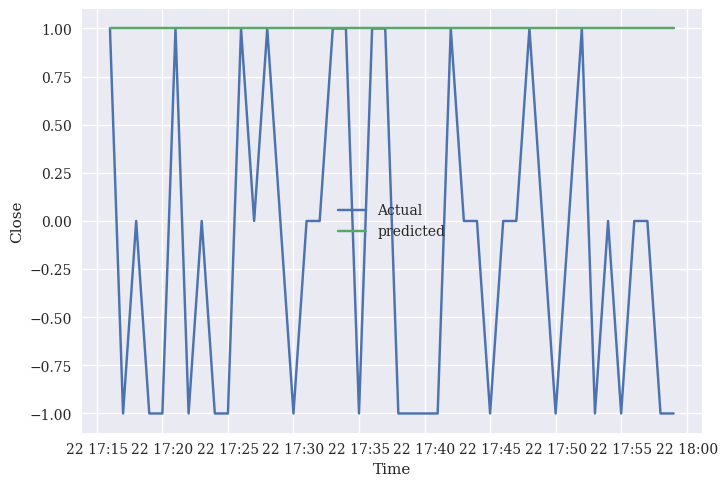

In [ ]:
plt.plot(test["direction"],label="Actual")
plt.plot(test["prediction"],label='predicted')
plt.xlabel("Time")
plt.ylabel("Close")
plt.legend()
plt.show()